# 앙상블(Ensemble)
### 앙상블 학습 : 여러개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것

### 앙상블의 종류 : 보팅(Voting), 배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking)...

- 보팅 : 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것
- 배깅 : 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 결합하는 것
- 부스팅 : 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방법
- 스태킹 : 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타모델)로 재학습시켜 결과를 예측하는 방법

# 1. 보팅(Voting)
### 여러 개의 분류기가 투표를 통해 최종 예측결과를 결정하는 방식

## 보팅 유형 : 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

### 하드 보팅 


- 다수결의 원칙과 비슷
- 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
### 소프트 보팅


- 분류기들의 레이블 값 결정 확률을 모두 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정
- 일반적으로 더 많이 사용됨

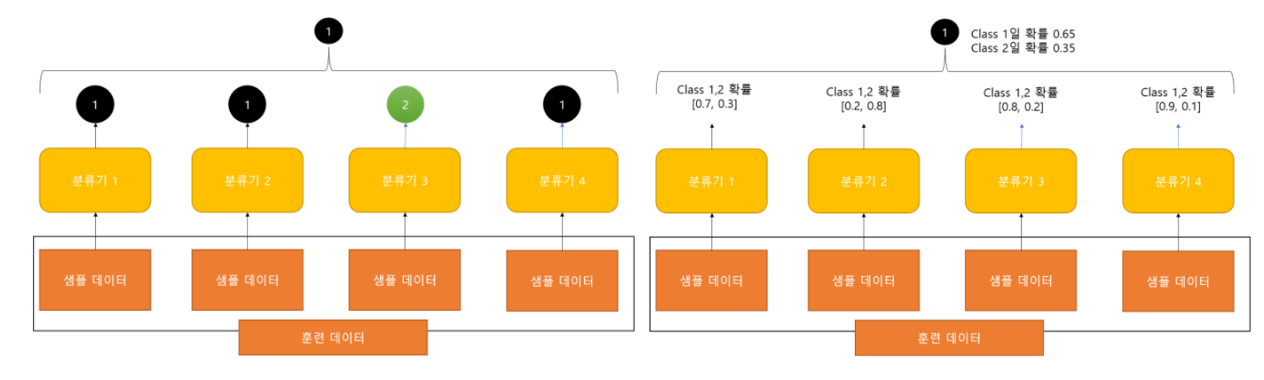

## 보팅 분류기를 이용한 분석
- sklearn의 VotingClassifier 클래스 사용
- 로지스틱 회귀와 의사결정나무 기반 보팅분류기 생성

### 위스콘신 유방암 데이터 세트 : 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트

In [5]:
# 라이브러리
import pandas as pd

from sklearn.ensemble import VotingClassifier        # Voting을 실행하는 클래스
from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀 모델
from sklearn.tree import DecisionTreeClassifier      # 의사결정나무 모델

from sklearn.datasets import load_breast_cancer      # 위스콘신 유방암 데이터 불러오기

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

### 데이터 불러오기

In [6]:
cancer = load_breast_cancer()
data_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### VotingClassifier 클래스를 이용한 보팅 분류기 생성
- 주요 인자로 estimators와 voting 값을 입력 받음
- estimators는 리스트 값으로 보팅에 사용될 여러개의 분류기를 받음
- voting은 'hard' 시 하드보팅, 'soft'시 소프트 보팅 방식을 적용하라는 의미 (기본값 : 'hard')

In [7]:
# 개별 모델은 로지스틱과 의사결정나무
model_1=LogisticRegression()
model_2=DecisionTreeClassifier(max_depth=2)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf=VotingClassifier(estimators=[('Logistic',model_1),('DT',model_2)],voting='soft')

In [8]:
# 평가 & 검증을 위한 데이터 분리
X=cancer.data
Y=cancer.target

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=156)

### VotingClassifier 학습 / 예측 / 평가

In [9]:
vo_clf.fit(X_train,y_train)   # 모델 훈련
pred=vo_clf.predict(X_test)   # 훈련된 모델으로 예측

print('voting 분류기 정확도:',accuracy_score(y_test,pred))

voting 분류기 정확도: 0.9473684210526315


### 개별 모델 학습 / 예측 / 평가

In [10]:
model_1.fit(X_train,y_train)
pred_1=model_1.predict(X_test)

model_2.fit(X_train,y_train)
pred_2=model_2.predict(X_test)

print('voting 분류기 정확도:',accuracy_score(y_test,pred))
print('Logistic  정확도:',accuracy_score(y_test,pred_1))
print('DT  정확도:',accuracy_score(y_test,pred_2))

voting 분류기 정확도: 0.9473684210526315
Logistic  정확도: 0.9385964912280702
DT  정확도: 0.9298245614035088


## 주의점 
- 보팅으로 여러 개의 기반 분류기를 결합한다고 무조건 기반 분류기보다 예측성능이 향상되지는 않는다. 
- 데이터의 특성과 분포등 다양한 요건에 따라 오히려 기반 분류기 중 가장 좋은 분류기의 성능이 더 좋을 수 있다.

# 2. 배깅 (Bagging) 
### Bagging (bootstrap aggregation) 
- 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑(bootstrapping) 분할 방식이라고 한다.
- 서브 데이터의 건수는 전체 데이터 건수와 동일


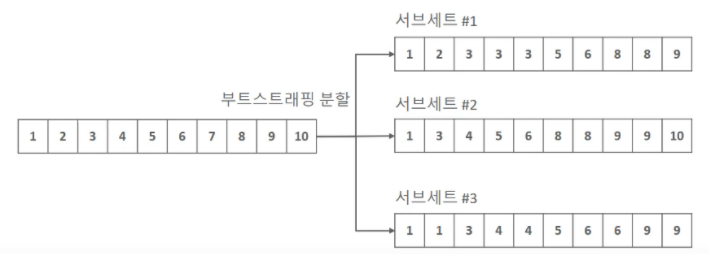

# 랜덤 포레스트(Random Forest)
### 배깅의 대표적인 알고리즘으로 가장 많이 사용되는 알고리즘 중 하나 ( + 분산적인 측면)

### 랜덤 포레스트의 주요 하이퍼파라미터
- n_estimators :랜덤 포레스트에서 결정 트리의 개수를 지정. default는 10, 늘리면 성능이 향상되지만 시간적인 cost를 고려해야함
- max_features, max_depth, min_samples_leaf 등과 같은 하이퍼 파라미터는 의사결정나무와 동일한 역할

## 랜덤 포레스트를 활용한 분석 
#### 위와 동일하게 위스콘신 암 데이터를 사용

In [12]:
# 모델 불러오기
from sklearn.ensemble import RandomForestClassifier

# 데이터 불러오기
X=cancer.data
Y=cancer.target

# 데이터 분리
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=156)

### 모델 학습 / 예측 / 평가

In [13]:
rf_clf=RandomForestClassifier(random_state=0) # random_state는 데이터 샘플링에 대한 지정 넘버

# 훈련
rf_clf.fit(X_train,y_train)

# 예측
pred_rf=rf_clf.predict(X_test)

# 평가
print('Random Forest  정확도:',accuracy_score(y_test,pred_rf))

Random Forest  정확도: 0.956140350877193


## GridSearchCV를 이용한 랜던포레스트의 하이퍼 파라미터 튜닝
### 데이터가 예측하기 쉬운 데이터이고 현재도 충분히 좋은 성능을 보여준다.
### 그러므로 큰 변화는 없을 것으로 예측되며, 오히려 복잡한 과적합으로 성능이 떨어질 수도 있을 것으로 예상

In [14]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[5,10,20,50],
    'max_depth':[2,3,4,5,10],
    'min_samples_leaf':[2,3,5,7],
}

# RandomForestClassifier 객체 생성 후 GridsearchCV 수행
rf_clf=RandomForestClassifier(random_state=0,n_jobs=-1)   # n_jobs : 사용할 cpu 코어수 # -1은 전부 사용한다는 뜻
grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=5)

# 훈련 & best 파라미터 선정
grid_cv.fit(X_train,y_train)
print('Best params:',grid_cv.best_params_)
print('Best Accuracy:',grid_cv.best_score_)

Best params: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 20}
Best Accuracy: 0.9626373626373625


### 최적 파라미터를 활용한 모델링 및 예측

In [15]:
rf_clf_best=RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=20,random_state=0)

rf_clf_best.fit(X_train,y_train)         # 모델링 = 모델 훈련
pred_rf_best=rf_clf_best.predict(X_test) # 예측

print('정확도:',accuracy_score(y_test,pred_rf_best))

정확도: 0.956140350877193


## Feature Importance


In [16]:
ftr_imporatances_values=rf_clf_best.feature_importances_
ftr_importances=pd.Series(ftr_imporatances_values,index=cancer.feature_names)
ftr_top=ftr_importances.sort_values(ascending=False)

In [17]:
ftr_top

worst concave points       0.179711
mean concave points        0.122934
worst area                 0.116271
worst perimeter            0.105200
worst radius               0.092214
area error                 0.065015
worst concavity            0.049034
radius error               0.047872
mean concavity             0.046259
mean area                  0.043432
worst texture              0.018325
mean perimeter             0.017593
mean texture               0.011523
worst symmetry             0.008779
worst compactness          0.008186
worst fractal dimension    0.008054
worst smoothness           0.007790
mean radius                0.007532
perimeter error            0.005842
texture error              0.005739
mean symmetry              0.005010
mean smoothness            0.004386
fractal dimension error    0.004290
concave points error       0.004071
symmetry error             0.003901
concavity error            0.003826
mean compactness           0.002600
compactness error          0

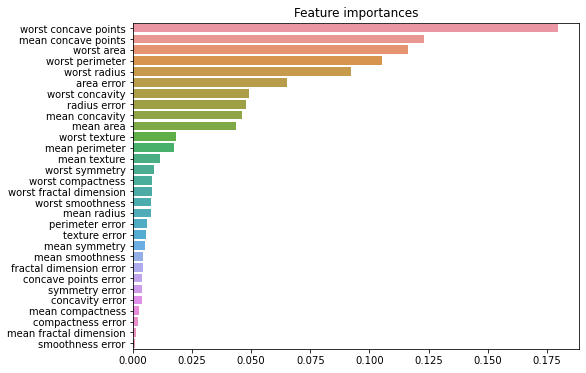

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top,y=ftr_top.index)
plt.show()

# 3.부스팅
## 부스팅
여러 개의 약학 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

## 에이다부스트(AdaBoost)

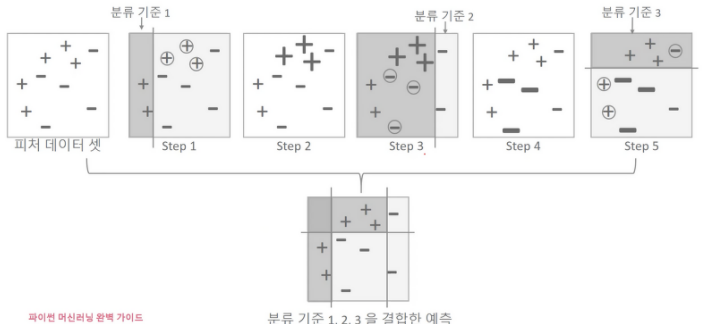

- Step 1은 첫 번째 약한 학습기(weak learner)가 분류 기준 1로 +와 -를 분류한 것. 잘못 분류된 데이터는 동그라미 표시
- Step 2에서는 이 오류 데이터에 대해서 가중치 값을 부여. 가중치가 부여된 오류 + 데이터는 다음 약한 학습기가 더 잘 분류할 수 있게 됨
- Step 3은 두번째 약학 학습기가 분류 기준 2로 +와 -를 분류. 마찬가지로 잘못 분류된 데이터는 동그라미 표시
- Step 4에서는 잘못 분류된 - 오류 데이터에 대해 다음 약한 학습기가 잘 분류할 수 있게 더 큰 가중치를 부여
- Step 5는 세 번째 약한 학습기가 분류 기준 3으로 +와 -를 분류하고 오류 데이터 발견
- 마지막으로 맨 아래에는 3가지 약한 학습기를 모두 결합한 결과 예측

### 배깅과 부스팅의 속도차이
부스팅은 오류 데이터에 가중치를 부여해줘야하는 과정이 있기에 배깅보다 많은 시간이 소요된다.

## GBM(Gradient Boost Machine)
### 가중치 업데이트를 경사하강법(Gradient Descent)을 이용한다.
- 경사하강법 : 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test,gb_pred)

In [21]:
gb_accuracy

0.956140350877193

### GBM의 하이퍼 파라미터 튜닝
- n_estimators, max_depth, max_features와 같은 트리 기반 자체의 파라미터
- loss: 경사 하강법에서 사용할 비용 함수를 지정 (ex.deviance,rmse...)
- n_estimator: weak leaner의 개수 (기본 값은 100)
- learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률으로 Weak learner가 순차적으로 오류값을 보정해 나가는 데 적용하는 계수. 0~1사이의 값을 지정할 수 있으며 기본값은 0.1 (작을수록 과대적합, 클수록 과소적합 되기 싶다.)

In [22]:
from sklearn.model_selection import GridSearchCV
params={
    'n_estimators':[100,200,500,1000],
    'learning_rate':[0.01,0.05,0.1]
}
grid_cv_gb=GridSearchCV(gb_clf,param_grid=params,cv=5,verbose=1)
grid_cv_gb.fit(X_train,y_train)

print('Best params:',grid_cv_gb.best_params_)
print('Best Accuracy:',grid_cv_gb.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   55.6s finished


Best params: {'learning_rate': 0.1, 'n_estimators': 500}
Best Accuracy: 0.9560439560439562


## XGBoost(eXtra Gradient Boost)
- GBM을 기반으로 하지만, GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제를 해결한 모델
- CPU환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습을 완료할 수 있다.
- 자체 내장된 교차 검증이 있으며 조기 중단 기능이 존재한다.
- 결손값을 자체 처리할 수 있는 기능을 가지고 있다.

### 설치

In [28]:
# XGBoost 설치
#pip install xgboost

In [29]:
# XGBoost 분류기 불러오기
from xgboost import XGBClassifier

## XGBoost 적용 - 위스콘신 유방암 예측

In [30]:
xgb_clf=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3,early_stopping_round=100)
xgb_clf.fit(X_train,y_train)
pred_xgb=xgb_clf.predict(X_test)

[15:04:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:04:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [31]:
accuracy_score(y_test,pred_xgb)

0.9736842105263158

## LightGBM
- XGBoost역시 GridSearchCV를 실행하면 시간이 많이 걸린다.
- LightGBM은 XGBoost보다도 학습에 걸리는 시간이 적다.
- 메모리 사용량도 상대적으로 작은편
- 작은 사이즈(10000개이하)의 데이터 세트에 적용할 경우 과적합이 발생하기 쉽다. 
- 리프 중심 트리 분할 방식을 사용(트리의 균형을 맞추지 않고 오류 손실 최소화만을 목표로 함)
- 비대칭적 tree가 된다.
- 카테고리형 피처의자동 변환과 최적 분할(원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환


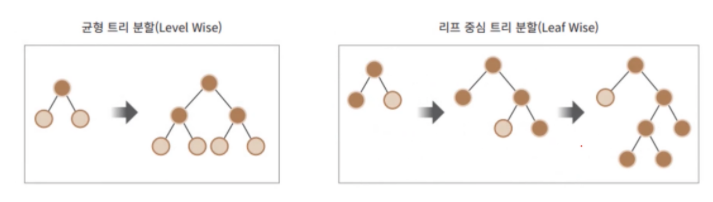

### 설치

In [33]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


### 주의사항
#### LightGBM은 리프노드가 계속 분할되면서 트리의 깊이가 깊어지므로 이러한 특성에 맞는 하이퍼 파라미터 설정이 필요

## LightGBM 적용 - 위스콘신 유방암 예측

In [34]:
# Light GBM import 
from lightgbm import LGBMClassifier

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_clf=LGBMClassifier(n_estimators=400)
lgbm_clf.fit(X_train,y_train)
pred_lgbm=lgbm_clf.predict(X_test)


In [35]:
accuracy_score(y_test,pred_lgbm)

0.9385964912280702

In [36]:
X_train.shape

(455, 30)

### 데이터 사이즈가 작아서 과적합이 발생했음을 예상

# 4. 스태킹(Stacking)
## 스태킹
개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행하는 방법으로 여러 알고리즘을 서로 결합한 앙상블 방법

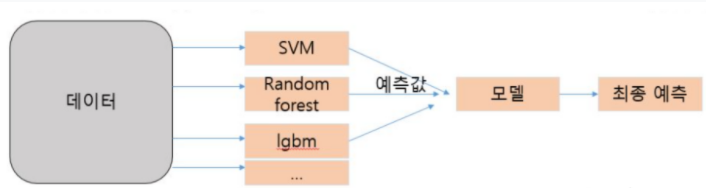

# 5. 분류실습 - 캐글 산탄데르 고객 만족 예측

## 산타데르 고객 만족 예측 분석
- 370개의 피처로 주어진 데이터 세트 기반에서 고객 만족 여부를 예측하는 것
- 산탄데르 은행에서 캐글에 경연을 의뢰한 데이터로서 피처 이름은 모두 익명 처리되어 있음
- 클래스 레이블 명은 TARGET이며, 이 값이 1이면 불만을 가진 고객, 0 이면 만족한 고객
- 대부분이 만족이고 불만족 데이터는 일부이기 때문에 모델의 성능 평가는 ROC-AUC(ROC 곡선 영역)로 평가
- 데이터는 https://www.kaggle.com/c/santander-customer-satisfaction/data 에서 받을 수 있음

### 데이터 전처리

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df=pd.read_csv("train_santander.csv",encoding='latin-1')
print('dataset shape:',cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [41]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


111개의 피처가 float형, 260개의 피처가 int형으로 모든 피처가 숫자 형이며, NULL값은 없다

In [43]:
# 레이블인 Target속성의 값의 분포 확인
print(cust_df['TARGET'].value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64


In [44]:
cust_df['TARGET'].value_counts()/cust_df.shape[0]

0    0.960431
1    0.039569
Name: TARGET, dtype: float64

불만족의 비율은 고작 4%에 불과하다.

In [45]:
# describe를 통한 피처의 값 분포 확인
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


- var3의 경우 min값이 -999999

In [46]:
cust_df.var3.value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64

In [51]:
dd=cust_df[cust_df['var3']<2]
dd

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
90,173,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102074.610,0
443,888,0,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93480.090,0
550,1100,1,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0
757,1517,0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0
782,1567,-999999,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75386,150558,1,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48446.580,0
75529,150871,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115863.600,0
75627,151064,1,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99805.170,0
75783,151396,-999999,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


- 999999 가 116개가 있다.
- Nan 결측치 값을 -999999으로 전환한 것으로 판단하고 최빈 값인 2로 전환한다

In [52]:
cust_df['var3'].replace(-999999,2,inplace=True)

In [53]:
# ID는 식별용이므로 drop한다
cust_df.drop('ID',axis=1,inplace=True)

In [54]:
# 피처와 target분리

In [55]:
X=cust_df.drop('TARGET',axis=1)
y=cust_df['TARGET']

In [56]:
X

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160


## 학습과 성능 평가를 위해서 원본 데이터 세트에서 학습 데이터 세트와 테스트 데이터 세트를 분리

### 비대칭 데이터이므로 분리시 TARGET(Y)값의 분포도가 학습 데이터와 테스트 데이터 세트에 모두 비슷하게 추출됐는지 확인해야함

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/y_train.count())
print('테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/y_test.count())

학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64
테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


### 비슷하게 4%정도의 비율을 보유하고 있음을 확인했다

## XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [61]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC :',xgb_roc_score)

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88238	validation_1-auc:0.84101
[17]	validation_0-auc:0.88354	validation_1-auc:0.84071
[18]	validation_0-au

## 하이퍼 파라미터 튜닝
- 컬럼의 개수가 많으므로 과적합 가능성을 가정하고, max_depth,min_child_weight,colsample_bytree 하이터 파라미터만 일차 튜닝
- 그후 추출된 최적의 하이퍼 파라미터를 적용해 다른 하이퍼 파라미터 튜닝을 실시
- 시간이 너무 오래 걸리므로 n_estimator를 100으로 하고, 조기 중단을 30으로 한다
- 우선 """ 를 사용하여 주석 처리한다

In [62]:
"""
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# cv는 3으로 지정 
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))
"""

'\nfrom sklearn.model_selection import GridSearchCV\n\n# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소\nxgb_clf = XGBClassifier(n_estimators=100)\n\nparams = {\'max_depth\':[5, 7] , \'min_child_weight\':[1,3] ,\'colsample_bytree\':[0.5, 0.75] }\n\n# cv는 3으로 지정 \ngridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)\ngridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",\n           eval_set=[(X_train, y_train), (X_test, y_test)])\n\nprint(\'GridSearchCV 최적 파라미터:\',gridcv.best_params_) \n\nxgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average=\'macro\')\nprint(\'ROC AUC: {0:.4f}\'.format(xgb_roc_score))\n'

### colsample_bytree:0.75, max_depth:7, min_shild_weight:1 이 최적 파라미터로 선정되었으며, 이를 이용하여 다음과 같은 모델로 모델링을 실시한다

In [63]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.73501	validation_1-auc:0.74128
[1]	validation_0-auc:0.82359	validation_1-auc:0.81776
[2]	validation_0-auc:0.81094	validation_1-auc:0.80194
[3]	validation_0-auc:0.81288	validation_1-auc:0.80637
[4]	validation_0-auc:0.82564	validation_1-auc:0.81831
[5]	validation_0-auc:0.83066	validation_1-auc:0.82196
[6]	validation_0-auc:0.83608	validation_1-auc:0.82734
[7]	validation_0-auc:0.83832	validation_1-auc:0.82902
[8]	validation_0-auc:0.84104	validation_1-auc:0.83114
[9]	validation_0-auc:0.84000	validation_1-auc:0.83020
[10]	validation_0-auc:0.84155	validation_1-auc:0.83071
[11]	validation_0-auc:0.84090	validation_1-auc:0.82996
[12]	validation_0-auc:0.84176	validation_1-auc:0.83039
[13]	validation_0-auc:0.83971	validation_1-auc:0.82909
[14]	validation_0-auc:0.84151	validation_1-auc:0.83008
[15]	validation_0-auc:0.84436	validation_1-auc:0.83231
[16]	validation_0-auc:0.84481	validation_1-auc:0.83256
[17]	validation_0-auc:0.84456	validation_1-auc:0.83193
[18]	validation_0-au

[149]	validation_0-auc:0.88004	validation_1-auc:0.84340
[150]	validation_0-auc:0.88031	validation_1-auc:0.84355
[151]	validation_0-auc:0.88060	validation_1-auc:0.84368
[152]	validation_0-auc:0.88084	validation_1-auc:0.84378
[153]	validation_0-auc:0.88104	validation_1-auc:0.84380
[154]	validation_0-auc:0.88125	validation_1-auc:0.84384
[155]	validation_0-auc:0.88149	validation_1-auc:0.84387
[156]	validation_0-auc:0.88158	validation_1-auc:0.84388
[157]	validation_0-auc:0.88186	validation_1-auc:0.84398
[158]	validation_0-auc:0.88210	validation_1-auc:0.84413
[159]	validation_0-auc:0.88229	validation_1-auc:0.84415
[160]	validation_0-auc:0.88256	validation_1-auc:0.84416
[161]	validation_0-auc:0.88288	validation_1-auc:0.84411
[162]	validation_0-auc:0.88301	validation_1-auc:0.84393
[163]	validation_0-auc:0.88313	validation_1-auc:0.84387
[164]	validation_0-auc:0.88341	validation_1-auc:0.84398
[165]	validation_0-auc:0.88367	validation_1-auc:0.84393
[166]	validation_0-auc:0.88396	validation_1-auc:

[296]	validation_0-auc:0.90501	validation_1-auc:0.84358
[297]	validation_0-auc:0.90509	validation_1-auc:0.84353
[298]	validation_0-auc:0.90521	validation_1-auc:0.84359
[299]	validation_0-auc:0.90528	validation_1-auc:0.84360
[300]	validation_0-auc:0.90535	validation_1-auc:0.84360
[301]	validation_0-auc:0.90539	validation_1-auc:0.84356
[302]	validation_0-auc:0.90546	validation_1-auc:0.84351
[303]	validation_0-auc:0.90551	validation_1-auc:0.84354
[304]	validation_0-auc:0.90556	validation_1-auc:0.84352
[305]	validation_0-auc:0.90565	validation_1-auc:0.84349
[306]	validation_0-auc:0.90583	validation_1-auc:0.84348
[307]	validation_0-auc:0.90587	validation_1-auc:0.84351
[308]	validation_0-auc:0.90594	validation_1-auc:0.84350
[309]	validation_0-auc:0.90599	validation_1-auc:0.84340
[310]	validation_0-auc:0.90607	validation_1-auc:0.84342
[311]	validation_0-auc:0.90628	validation_1-auc:0.84340
[312]	validation_0-auc:0.90634	validation_1-auc:0.84342
[313]	validation_0-auc:0.90647	validation_1-auc:

## Feature importances

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

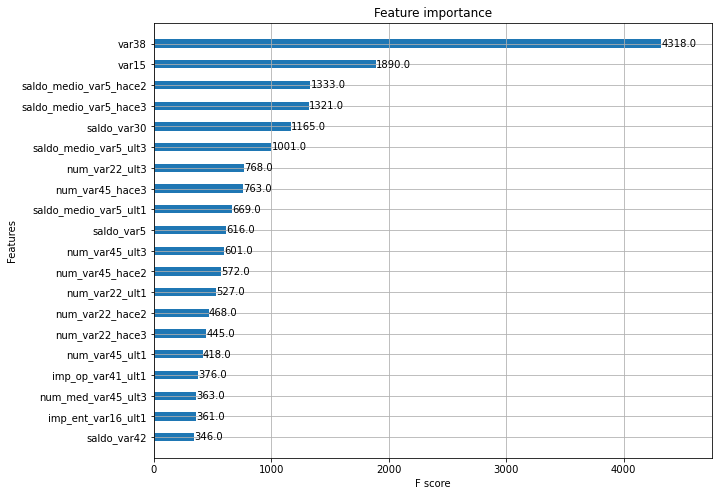

In [64]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

## LGBM 모델 학습과 하이퍼 파라미터 튜닝

- 앞의 XGBoost 예제 코드에서 만들어진 데이터 세트를 기반으로 LightGBM으로 학습을 수행

In [65]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

### 하이퍼 파라미터 튜닝

In [68]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	val

[30]	valid_0's auc: 0.874076	valid_0's binary_logloss: 0.12403	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139411
[31]	valid_0's auc: 0.874768	valid_0's binary_logloss: 0.123745	valid_1's auc: 0.839314	valid_1's binary_logloss: 0.139314
[32]	valid_0's auc: 0.875593	valid_0's binary_logloss: 0.123486	valid_1's auc: 0.838875	valid_1's binary_logloss: 0.139322
[33]	valid_0's auc: 0.8767	valid_0's binary_logloss: 0.123182	valid_1's auc: 0.838809	valid_1's binary_logloss: 0.139329
[34]	valid_0's auc: 0.87774	valid_0's binary_logloss: 0.122892	valid_1's auc: 0.838376	valid_1's binary_logloss: 0.139342
[35]	valid_0's auc: 0.878372	valid_0's binary_logloss: 0.122634	valid_1's auc: 0.838454	valid_1's binary_logloss: 0.13931
[36]	valid_0's auc: 0.879098	valid_0's binary_logloss: 0.122414	valid_1's auc: 0.838895	valid_1's binary_logloss: 0.13925
[37]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.122216	valid_1's auc: 0.838441	valid_1's binary_logloss: 0.139302
[38]	valid_0's auc: 0.

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	val

[30]	valid_0's auc: 0.874076	valid_0's binary_logloss: 0.12403	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139411
[31]	valid_0's auc: 0.874768	valid_0's binary_logloss: 0.123745	valid_1's auc: 0.839314	valid_1's binary_logloss: 0.139314
[32]	valid_0's auc: 0.875593	valid_0's binary_logloss: 0.123486	valid_1's auc: 0.838875	valid_1's binary_logloss: 0.139322
[33]	valid_0's auc: 0.8767	valid_0's binary_logloss: 0.123182	valid_1's auc: 0.838809	valid_1's binary_logloss: 0.139329
[34]	valid_0's auc: 0.87774	valid_0's binary_logloss: 0.122892	valid_1's auc: 0.838376	valid_1's binary_logloss: 0.139342
[35]	valid_0's auc: 0.878372	valid_0's binary_logloss: 0.122634	valid_1's auc: 0.838454	valid_1's binary_logloss: 0.13931
[36]	valid_0's auc: 0.879098	valid_0's binary_logloss: 0.122414	valid_1's auc: 0.838895	valid_1's binary_logloss: 0.13925
[37]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.122216	valid_1's auc: 0.838441	valid_1's binary_logloss: 0.139302
[38]	valid_0's auc: 0.

[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_logloss: 0.142423	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.854735	valid_0's binary_logloss: 0.139746	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.151136
[6]	valid_0's auc: 0.856928	valid_0's binary_logloss: 0.137509	valid_1's auc: 0.835605	valid_1's binary_logloss: 0.14924
[7]	valid_0's auc: 0.859448	valid_0's binary_logloss: 0.135575	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.861685	valid_0's binary_logloss: 0.133953	valid_1's auc: 0.834408	vali

[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_logloss: 0.164985
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839353	valid_0's binary_logloss: 0.149977	valid_1's auc: 0.822571	valid_1's binary_logloss: 0.159808
[3]	valid_0's auc: 0.847366	valid_0's binary_logloss: 0.145866	valid_1's auc: 0.829312	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.850911	valid_0's binary_logloss: 0.14247	valid_1's auc: 0.830848	valid_1's binary_logloss: 0.153328
[5]	valid_0's auc: 0.854674	valid_0's binary_logloss: 0.139764	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.151023
[6]	valid_0's auc: 0.856722	valid_0's binary_logloss: 0.1375	valid_1's auc: 0.834264	valid_1's binary_logloss: 0.149166
[7]	valid_0's auc: 0.858253	valid_0's binary_logloss: 0.135713	valid_1's auc: 0.834998	valid_1's binary_logloss: 0.147631
[8]	valid_0's auc: 0.859768	valid_0's binary_logloss: 0.134063	valid_1's auc: 0.835678	v

[23]	valid_0's auc: 0.882402	valid_0's binary_logloss: 0.121554	valid_1's auc: 0.829254	valid_1's binary_logloss: 0.141805
[24]	valid_0's auc: 0.883011	valid_0's binary_logloss: 0.121078	valid_1's auc: 0.829054	valid_1's binary_logloss: 0.14178
[25]	valid_0's auc: 0.884627	valid_0's binary_logloss: 0.120587	valid_1's auc: 0.82942	valid_1's binary_logloss: 0.141653
[26]	valid_0's auc: 0.885304	valid_0's binary_logloss: 0.120169	valid_1's auc: 0.828716	valid_1's binary_logloss: 0.141755
[27]	valid_0's auc: 0.88664	valid_0's binary_logloss: 0.119673	valid_1's auc: 0.828869	valid_1's binary_logloss: 0.141682
[28]	valid_0's auc: 0.887143	valid_0's binary_logloss: 0.119308	valid_1's auc: 0.828987	valid_1's binary_logloss: 0.141649
[29]	valid_0's auc: 0.88825	valid_0's binary_logloss: 0.1189	valid_1's auc: 0.829075	valid_1's binary_logloss: 0.141601
[30]	valid_0's auc: 0.889081	valid_0's binary_logloss: 0.118531	valid_1's auc: 0.828871	valid_1's binary_logloss: 0.141605
[31]	valid_0's auc: 0.

[20]	valid_0's auc: 0.880489	valid_0's binary_logloss: 0.122856	valid_1's auc: 0.835385	valid_1's binary_logloss: 0.141032
[21]	valid_0's auc: 0.881696	valid_0's binary_logloss: 0.122219	valid_1's auc: 0.835822	valid_1's binary_logloss: 0.140843
[22]	valid_0's auc: 0.882257	valid_0's binary_logloss: 0.121726	valid_1's auc: 0.835849	valid_1's binary_logloss: 0.140761
[23]	valid_0's auc: 0.883635	valid_0's binary_logloss: 0.121206	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.140607
[24]	valid_0's auc: 0.884533	valid_0's binary_logloss: 0.120734	valid_1's auc: 0.836473	valid_1's binary_logloss: 0.14049
[25]	valid_0's auc: 0.885234	valid_0's binary_logloss: 0.120268	valid_1's auc: 0.836722	valid_1's binary_logloss: 0.140403
[26]	valid_0's auc: 0.886292	valid_0's binary_logloss: 0.119794	valid_1's auc: 0.836549	valid_1's binary_logloss: 0.140423
[27]	valid_0's auc: 0.887064	valid_0's binary_logloss: 0.119366	valid_1's auc: 0.836155	valid_1's binary_logloss: 0.140447
[28]	valid_0's au

[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	vali

[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831974	valid_0's binary_logloss: 0.151137	valid_1's auc: 0.82532	valid_1's binary_logloss: 0.159691
[3]	valid_0's auc: 0.839496	valid_0's binary_logloss: 0.14733	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.156
[4]	valid_0's auc: 0.843984	valid_0's binary_logloss: 0.144371	valid_1's auc: 0.834064	valid_1's binary_logloss: 0.153082
[5]	valid_0's auc: 0.845854	valid_0's binary_logloss: 0.142024	valid_1's auc: 0.836918	valid_1's binary_logloss: 0.150735
[6]	valid_0's auc: 0.848041	valid_0's binary_logloss: 0.140009	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.148771
[7]	valid_0's auc: 0.849655	valid_0's binary_logloss: 0.138307	valid_1's auc: 0.839111	valid_1's binary_logloss: 0.147373
[8]	valid_0's auc: 0.85185	valid_0's binary_logloss: 0.136891	valid_1's auc: 0.838955	vali

[34]	valid_0's auc: 0.890626	valid_0's binary_logloss: 0.118328	valid_1's auc: 0.829368	valid_1's binary_logloss: 0.141161
[35]	valid_0's auc: 0.89116	valid_0's binary_logloss: 0.11806	valid_1's auc: 0.829262	valid_1's binary_logloss: 0.141183
[36]	valid_0's auc: 0.891999	valid_0's binary_logloss: 0.11775	valid_1's auc: 0.828947	valid_1's binary_logloss: 0.14129
[37]	valid_0's auc: 0.892306	valid_0's binary_logloss: 0.117477	valid_1's auc: 0.828544	valid_1's binary_logloss: 0.141389
[38]	valid_0's auc: 0.892937	valid_0's binary_logloss: 0.117192	valid_1's auc: 0.827983	valid_1's binary_logloss: 0.141516
[39]	valid_0's auc: 0.893563	valid_0's binary_logloss: 0.116869	valid_1's auc: 0.828068	valid_1's binary_logloss: 0.141517
[40]	valid_0's auc: 0.893942	valid_0's binary_logloss: 0.11662	valid_1's auc: 0.827852	valid_1's binary_logloss: 0.141621
Early stopping, best iteration is:
[10]	valid_0's auc: 0.862964	valid_0's binary_logloss: 0.132331	valid_1's auc: 0.835026	valid_1's binary_logl

[20]	valid_0's auc: 0.877885	valid_0's binary_logloss: 0.124484	valid_1's auc: 0.835893	valid_1's binary_logloss: 0.140933
[21]	valid_0's auc: 0.879121	valid_0's binary_logloss: 0.12391	valid_1's auc: 0.837029	valid_1's binary_logloss: 0.140651
[22]	valid_0's auc: 0.880116	valid_0's binary_logloss: 0.123339	valid_1's auc: 0.837366	valid_1's binary_logloss: 0.140547
[23]	valid_0's auc: 0.881224	valid_0's binary_logloss: 0.12282	valid_1's auc: 0.837357	valid_1's binary_logloss: 0.140445
[24]	valid_0's auc: 0.882014	valid_0's binary_logloss: 0.122386	valid_1's auc: 0.837343	valid_1's binary_logloss: 0.140371
[25]	valid_0's auc: 0.88318	valid_0's binary_logloss: 0.121861	valid_1's auc: 0.83723	valid_1's binary_logloss: 0.140313
[26]	valid_0's auc: 0.884008	valid_0's binary_logloss: 0.121441	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.140173
[27]	valid_0's auc: 0.884676	valid_0's binary_logloss: 0.121001	valid_1's auc: 0.838046	valid_1's binary_logloss: 0.140086
[28]	valid_0's auc: 

[35]	valid_0's auc: 0.89116	valid_0's binary_logloss: 0.11806	valid_1's auc: 0.829262	valid_1's binary_logloss: 0.141183
[36]	valid_0's auc: 0.891999	valid_0's binary_logloss: 0.11775	valid_1's auc: 0.828947	valid_1's binary_logloss: 0.14129
[37]	valid_0's auc: 0.892306	valid_0's binary_logloss: 0.117477	valid_1's auc: 0.828544	valid_1's binary_logloss: 0.141389
[38]	valid_0's auc: 0.892937	valid_0's binary_logloss: 0.117192	valid_1's auc: 0.827983	valid_1's binary_logloss: 0.141516
[39]	valid_0's auc: 0.893563	valid_0's binary_logloss: 0.116869	valid_1's auc: 0.828068	valid_1's binary_logloss: 0.141517
[40]	valid_0's auc: 0.893942	valid_0's binary_logloss: 0.11662	valid_1's auc: 0.827852	valid_1's binary_logloss: 0.141621
Early stopping, best iteration is:
[10]	valid_0's auc: 0.862964	valid_0's binary_logloss: 0.132331	valid_1's auc: 0.835026	valid_1's binary_logloss: 0.144789
[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_loglo

[19]	valid_0's auc: 0.876659	valid_0's binary_logloss: 0.125068	valid_1's auc: 0.835024	valid_1's binary_logloss: 0.141162
[20]	valid_0's auc: 0.877885	valid_0's binary_logloss: 0.124484	valid_1's auc: 0.835893	valid_1's binary_logloss: 0.140933
[21]	valid_0's auc: 0.879121	valid_0's binary_logloss: 0.12391	valid_1's auc: 0.837029	valid_1's binary_logloss: 0.140651
[22]	valid_0's auc: 0.880116	valid_0's binary_logloss: 0.123339	valid_1's auc: 0.837366	valid_1's binary_logloss: 0.140547
[23]	valid_0's auc: 0.881224	valid_0's binary_logloss: 0.12282	valid_1's auc: 0.837357	valid_1's binary_logloss: 0.140445
[24]	valid_0's auc: 0.882014	valid_0's binary_logloss: 0.122386	valid_1's auc: 0.837343	valid_1's binary_logloss: 0.140371
[25]	valid_0's auc: 0.88318	valid_0's binary_logloss: 0.121861	valid_1's auc: 0.83723	valid_1's binary_logloss: 0.140313
[26]	valid_0's auc: 0.884008	valid_0's binary_logloss: 0.121441	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.140173
[27]	valid_0's auc: 

[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827277	valid_0's binary_logloss: 0.151084	valid_1's auc: 0.819635	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837033	valid_0's binary_logloss: 0.14722	valid_1's auc: 0.828221	valid_1's binary_logloss: 0.156492
[4]	valid_0's auc: 0.840167	valid_0's binary_logloss: 0.14423	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.153586
[5]	valid_0's auc: 0.842499	valid_0's binary_logloss: 0.141721	valid_1's auc: 0.833301	valid_1's binary_logloss: 0.151219
[6]	valid_0's auc: 0.845403	valid_0's binary_logloss: 0.139708	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.149312
[7]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.138024	valid_1's auc: 0.836054	valid_1's binary_logloss: 0.14779
[8]	valid_0's auc: 0.849694	valid_0's binary_logloss: 0.136542	valid_1's auc: 0.837537	v

[26]	valid_0's auc: 0.870325	valid_0's binary_logloss: 0.125518	valid_1's auc: 0.839261	valid_1's binary_logloss: 0.139524
[27]	valid_0's auc: 0.871488	valid_0's binary_logloss: 0.125147	valid_1's auc: 0.839671	valid_1's binary_logloss: 0.139365
[28]	valid_0's auc: 0.87235	valid_0's binary_logloss: 0.12484	valid_1's auc: 0.840114	valid_1's binary_logloss: 0.139236
[29]	valid_0's auc: 0.872991	valid_0's binary_logloss: 0.124593	valid_1's auc: 0.839491	valid_1's binary_logloss: 0.139271
[30]	valid_0's auc: 0.874129	valid_0's binary_logloss: 0.124312	valid_1's auc: 0.839589	valid_1's binary_logloss: 0.13918
[31]	valid_0's auc: 0.875305	valid_0's binary_logloss: 0.123988	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.139184
[32]	valid_0's auc: 0.875943	valid_0's binary_logloss: 0.123748	valid_1's auc: 0.839268	valid_1's binary_logloss: 0.13919
[33]	valid_0's auc: 0.876575	valid_0's binary_logloss: 0.123484	valid_1's auc: 0.839549	valid_1's binary_logloss: 0.139075
[34]	valid_0's auc: 

[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827277	valid_0's binary_logloss: 0.151084	valid_1's auc: 0.819635	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837033	valid_0's binary_logloss: 0.14722	valid_1's auc: 0.828221	valid_1's binary_logloss: 0.156492
[4]	valid_0's auc: 0.840167	valid_0's binary_logloss: 0.14423	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.153586
[5]	valid_0's auc: 0.842499	valid_0's binary_logloss: 0.141721	valid_1's auc: 0.833301	valid_1's binary_logloss: 0.151219
[6]	valid_0's auc: 0.845403	valid_0's binary_logloss: 0.139708	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.149312
[7]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.138024	valid_1's auc: 0.836054	valid_1's binary_logloss: 0.14779
[8]	valid_0's auc: 0.849694	valid_0's binary_logloss: 0.136542	valid_1's auc: 0.837537	v

[36]	valid_0's auc: 0.893984	valid_0's binary_logloss: 0.116353	valid_1's auc: 0.827203	valid_1's binary_logloss: 0.14207
[37]	valid_0's auc: 0.89456	valid_0's binary_logloss: 0.11603	valid_1's auc: 0.827292	valid_1's binary_logloss: 0.142005
[38]	valid_0's auc: 0.89511	valid_0's binary_logloss: 0.115713	valid_1's auc: 0.827214	valid_1's binary_logloss: 0.14206
[39]	valid_0's auc: 0.895738	valid_0's binary_logloss: 0.115415	valid_1's auc: 0.82695	valid_1's binary_logloss: 0.142162
Early stopping, best iteration is:
[9]	valid_0's auc: 0.863391	valid_0's binary_logloss: 0.132468	valid_1's auc: 0.835623	valid_1's binary_logloss: 0.145549
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary_logloss: 

[34]	valid_0's auc: 0.893848	valid_0's binary_logloss: 0.11662	valid_1's auc: 0.836021	valid_1's binary_logloss: 0.140353
[35]	valid_0's auc: 0.894232	valid_0's binary_logloss: 0.116323	valid_1's auc: 0.8359	valid_1's binary_logloss: 0.140396
[36]	valid_0's auc: 0.895003	valid_0's binary_logloss: 0.115986	valid_1's auc: 0.835855	valid_1's binary_logloss: 0.140416
[37]	valid_0's auc: 0.895898	valid_0's binary_logloss: 0.115609	valid_1's auc: 0.836185	valid_1's binary_logloss: 0.140369
[38]	valid_0's auc: 0.896459	valid_0's binary_logloss: 0.11527	valid_1's auc: 0.835754	valid_1's binary_logloss: 0.140443
[39]	valid_0's auc: 0.897377	valid_0's binary_logloss: 0.114873	valid_1's auc: 0.835638	valid_1's binary_logloss: 0.140474
[40]	valid_0's auc: 0.89776	valid_0's binary_logloss: 0.114588	valid_1's auc: 0.835639	valid_1's binary_logloss: 0.140491
[41]	valid_0's auc: 0.898583	valid_0's binary_logloss: 0.114302	valid_1's auc: 0.835705	valid_1's binary_logloss: 0.140506
[42]	valid_0's auc: 0

[19]	valid_0's auc: 0.88046	valid_0's binary_logloss: 0.123313	valid_1's auc: 0.834629	valid_1's binary_logloss: 0.140738
[20]	valid_0's auc: 0.881517	valid_0's binary_logloss: 0.12269	valid_1's auc: 0.8347	valid_1's binary_logloss: 0.140611
[21]	valid_0's auc: 0.882464	valid_0's binary_logloss: 0.122095	valid_1's auc: 0.834656	valid_1's binary_logloss: 0.140487
[22]	valid_0's auc: 0.883744	valid_0's binary_logloss: 0.121504	valid_1's auc: 0.834562	valid_1's binary_logloss: 0.140328
[23]	valid_0's auc: 0.885301	valid_0's binary_logloss: 0.12091	valid_1's auc: 0.835278	valid_1's binary_logloss: 0.140199
[24]	valid_0's auc: 0.886266	valid_0's binary_logloss: 0.120437	valid_1's auc: 0.835728	valid_1's binary_logloss: 0.140094
[25]	valid_0's auc: 0.88755	valid_0's binary_logloss: 0.119931	valid_1's auc: 0.836199	valid_1's binary_logloss: 0.140076
[26]	valid_0's auc: 0.888525	valid_0's binary_logloss: 0.119473	valid_1's auc: 0.836708	valid_1's binary_logloss: 0.139945
[27]	valid_0's auc: 0.

[48]	valid_0's auc: 0.902688	valid_0's binary_logloss: 0.112198	valid_1's auc: 0.835495	valid_1's binary_logloss: 0.140691
[49]	valid_0's auc: 0.902922	valid_0's binary_logloss: 0.111944	valid_1's auc: 0.835281	valid_1's binary_logloss: 0.140819
[50]	valid_0's auc: 0.903747	valid_0's binary_logloss: 0.111595	valid_1's auc: 0.835359	valid_1's binary_logloss: 0.140811
[51]	valid_0's auc: 0.904427	valid_0's binary_logloss: 0.111354	valid_1's auc: 0.835245	valid_1's binary_logloss: 0.140873
[52]	valid_0's auc: 0.90467	valid_0's binary_logloss: 0.111111	valid_1's auc: 0.835057	valid_1's binary_logloss: 0.140993
[53]	valid_0's auc: 0.904868	valid_0's binary_logloss: 0.110853	valid_1's auc: 0.834751	valid_1's binary_logloss: 0.14108
[54]	valid_0's auc: 0.905166	valid_0's binary_logloss: 0.110627	valid_1's auc: 0.83411	valid_1's binary_logloss: 0.141282
[55]	valid_0's auc: 0.905665	valid_0's binary_logloss: 0.110375	valid_1's auc: 0.833739	valid_1's binary_logloss: 0.141413
Early stopping, bes

[21]	valid_0's auc: 0.863758	valid_0's binary_logloss: 0.127907	valid_1's auc: 0.838127	valid_1's binary_logloss: 0.139858
[22]	valid_0's auc: 0.864635	valid_0's binary_logloss: 0.127525	valid_1's auc: 0.838331	valid_1's binary_logloss: 0.139696
[23]	valid_0's auc: 0.865866	valid_0's binary_logloss: 0.127143	valid_1's auc: 0.837841	valid_1's binary_logloss: 0.139625
[24]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.126749	valid_1's auc: 0.838187	valid_1's binary_logloss: 0.139526
[25]	valid_0's auc: 0.867553	valid_0's binary_logloss: 0.126476	valid_1's auc: 0.838308	valid_1's binary_logloss: 0.13949
[26]	valid_0's auc: 0.868108	valid_0's binary_logloss: 0.126164	valid_1's auc: 0.838035	valid_1's binary_logloss: 0.139426
[27]	valid_0's auc: 0.869014	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.139445
[28]	valid_0's auc: 0.869797	valid_0's binary_logloss: 0.12559	valid_1's auc: 0.837894	valid_1's binary_logloss: 0.139419
[29]	valid_0's auc

[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.147423	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.156542
[4]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.144426	valid_1's auc: 0.831396	valid_1's binary_logloss: 0.153706
[5]	valid_0's auc: 0.843358	valid_0's binary_logloss: 0.142067	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.151399
[6]	valid_0's auc: 0.845601	valid_0's binary_logloss: 0.14009	valid_1's auc: 0.833857	valid_1's binary_logloss: 0.149488
[7]	valid_0's auc: 0.846477	valid_0's binary_logloss: 0.138491	valid_1's auc: 0.833143	valid_1's binary_logloss: 0.148023
[8]	valid_0's auc: 0.847725	valid_0's binary_logloss: 0.137129	valid_1's auc: 0.833971	

[25]	valid_0's auc: 0.867553	valid_0's binary_logloss: 0.126476	valid_1's auc: 0.838308	valid_1's binary_logloss: 0.13949
[26]	valid_0's auc: 0.868108	valid_0's binary_logloss: 0.126164	valid_1's auc: 0.838035	valid_1's binary_logloss: 0.139426
[27]	valid_0's auc: 0.869014	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.139445
[28]	valid_0's auc: 0.869797	valid_0's binary_logloss: 0.12559	valid_1's auc: 0.837894	valid_1's binary_logloss: 0.139419
[29]	valid_0's auc: 0.870435	valid_0's binary_logloss: 0.1253	valid_1's auc: 0.838103	valid_1's binary_logloss: 0.139321
[30]	valid_0's auc: 0.87141	valid_0's binary_logloss: 0.125025	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.139275
[31]	valid_0's auc: 0.872143	valid_0's binary_logloss: 0.124769	valid_1's auc: 0.837843	valid_1's binary_logloss: 0.139285
[32]	valid_0's auc: 0.872606	valid_0's binary_logloss: 0.124561	valid_1's auc: 0.837662	valid_1's binary_logloss: 0.139274
[33]	valid_0's auc: 0

[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846758	valid_0's binary_logloss: 0.146288	valid_1's auc: 0.824811	valid_1's binary_logloss: 0.15621
[4]	valid_0's auc: 0.850398	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830278	valid_1's binary_logloss: 0.153352
[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_logloss: 0.138329	valid_1's auc: 0.834881	valid_1's binary_logloss: 0.149277
[7]	valid_0's auc: 0.858115	valid_0's binary_logloss: 0.136481	valid_1's auc: 0.833603	valid_1's binary_logloss: 0.14786
[8]	valid_0's auc: 0.859479	valid_0's binary_logloss: 0.134947	valid_1's auc: 0.834093	va

[33]	valid_0's auc: 0.891629	valid_0's binary_logloss: 0.118259	valid_1's auc: 0.836206	valid_1's binary_logloss: 0.139603
[34]	valid_0's auc: 0.892446	valid_0's binary_logloss: 0.117893	valid_1's auc: 0.836005	valid_1's binary_logloss: 0.139603
[35]	valid_0's auc: 0.893407	valid_0's binary_logloss: 0.11752	valid_1's auc: 0.8361	valid_1's binary_logloss: 0.139574
[36]	valid_0's auc: 0.893836	valid_0's binary_logloss: 0.117247	valid_1's auc: 0.836147	valid_1's binary_logloss: 0.139608
[37]	valid_0's auc: 0.894774	valid_0's binary_logloss: 0.116913	valid_1's auc: 0.836601	valid_1's binary_logloss: 0.139569
[38]	valid_0's auc: 0.895494	valid_0's binary_logloss: 0.116611	valid_1's auc: 0.836232	valid_1's binary_logloss: 0.139645
[39]	valid_0's auc: 0.896102	valid_0's binary_logloss: 0.116275	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.139653
[40]	valid_0's auc: 0.896715	valid_0's binary_logloss: 0.115934	valid_1's auc: 0.836463	valid_1's binary_logloss: 0.139671
[41]	valid_0's auc:

[57]	valid_0's auc: 0.902422	valid_0's binary_logloss: 0.111944	valid_1's auc: 0.835493	valid_1's binary_logloss: 0.140993
Early stopping, best iteration is:
[27]	valid_0's auc: 0.884676	valid_0's binary_logloss: 0.121001	valid_1's auc: 0.838046	valid_1's binary_logloss: 0.140086
[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846758	valid_0's binary_logloss: 0.146288	valid_1's auc: 0.824811	valid_1's binary_logloss: 0.15621
[4]	valid_0's auc: 0.850398	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830278	valid_1's binary_logloss: 0.153352
[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_loglos

[37]	valid_0's auc: 0.894774	valid_0's binary_logloss: 0.116913	valid_1's auc: 0.836601	valid_1's binary_logloss: 0.139569
[38]	valid_0's auc: 0.895494	valid_0's binary_logloss: 0.116611	valid_1's auc: 0.836232	valid_1's binary_logloss: 0.139645
[39]	valid_0's auc: 0.896102	valid_0's binary_logloss: 0.116275	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.139653
[40]	valid_0's auc: 0.896715	valid_0's binary_logloss: 0.115934	valid_1's auc: 0.836463	valid_1's binary_logloss: 0.139671
[41]	valid_0's auc: 0.897232	valid_0's binary_logloss: 0.115612	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139762
[42]	valid_0's auc: 0.897875	valid_0's binary_logloss: 0.11528	valid_1's auc: 0.836151	valid_1's binary_logloss: 0.139777
[43]	valid_0's auc: 0.898493	valid_0's binary_logloss: 0.114999	valid_1's auc: 0.836216	valid_1's binary_logloss: 0.139761
[44]	valid_0's auc: 0.899179	valid_0's binary_logloss: 0.114703	valid_1's auc: 0.836328	valid_1's binary_logloss: 0.139755
Early stopping, b

[1]	training's auc: 0.824305	training's binary_logloss: 0.156217	valid_1's auc: 0.819488	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	training's auc: 0.828798	training's binary_logloss: 0.150959	valid_1's auc: 0.822075	valid_1's binary_logloss: 0.159734
[3]	training's auc: 0.839609	training's binary_logloss: 0.147147	valid_1's auc: 0.829436	valid_1's binary_logloss: 0.156119
[4]	training's auc: 0.845158	training's binary_logloss: 0.144107	valid_1's auc: 0.836147	valid_1's binary_logloss: 0.153073
[5]	training's auc: 0.847711	training's binary_logloss: 0.14162	valid_1's auc: 0.839041	valid_1's binary_logloss: 0.150773
[6]	training's auc: 0.849184	training's binary_logloss: 0.139622	valid_1's auc: 0.839076	valid_1's binary_logloss: 0.148948
[7]	training's auc: 0.85094	training's binary_logloss: 0.13786	valid_1's auc: 0.839943	valid_1's binary_logloss: 0.147346
[8]	training's auc: 0.853386	training's binary_logloss: 0.136418	valid_1's

GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=200),
             param_grid={'max_depth': [128, 160],
                         'min_child_samples': [60, 100], 'num_leaves': [32, 64],
                         'subsample': [0.8, 1]})

In [69]:
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC:',lgbm_roc_score)

GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subsample': 0.8}
ROC AUC: 0.8416587279076968


## 최적 하이퍼 파라미터를 적용한 훈련 & 평가

In [70]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	v

## 해당 데이터에서는 XGBoost가 더 좋은 성능을 보인다